In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#file = open("patient_cell_vector_data.txt","r")

In [2]:
# for line in file:
#     print(line)

In [3]:
df0 = pd.read_csv("patient_cell_vector_data.txt")

In [4]:
df = df0

In [6]:
df[df['PredictedClass']==2].shape

(72186, 7)

In [27]:
def add_cell_label(row):
    if(row['PredictedClass']==1):
        return 'Tumor_cell'
    elif(row['PredictedClass']==2):
        return 'Immune_cell'
    elif(row['PredictedClass']==3):
        return 'Other_cell'
    elif(row['PredictedClass']==4):
        return 'Macrophage'
    
def add_tumor(row):
    if(row['PredictedClass']==1):
        return 1
    else:
        return -1

def add_immune(row):
    if(row['PredictedClass']==2):
        return 1
    else:
        return -1
    

In [28]:
# df['cell_type'] = df.apply(add_cell_label,axis=1)
df['is_tumor'] = df.apply(add_tumor,axis=1)
df['is_immune'] = df.apply(add_immune,axis=1)

In [8]:
print("tumor cells:",df[df['PredictedClass']==1].shape[0])
print("immune cells:",df[df['PredictedClass']==2].shape[0])
print("other cells:",df[df['PredictedClass']==3].shape[0])
print("Macrophage:",df[df['PredictedClass']==4].shape[0])

tumor cells: 36217
immune cells: 72186
other cells: 23010
Macrophage: 53358


In [12]:
df.head()

,CentroidX,CentroidY,PredictedClass,TumorScore,TILScore,OtherScore,MacrophageScore,cell_type,is_tumor,is_immune
0,2488.1,2116.3,4,0.090909,0.000000,0.115702,0.793388,Macrophage,0,0
1,2509.5,2119.6,4,0.090909,0.000000,0.115702,0.793388,Macrophage,0,0
2,2483.0,2121.9,3,0.064748,0.014388,0.848921,0.071942,Other_cell,0,0
3,2524.1,2123.0,4,0.067308,0.096154,0.125000,0.711538,Macrophage,0,0
4,2535.5,2123.6,4,0.067308,0.096154,0.125000,0.711538,Macrophage,0,0


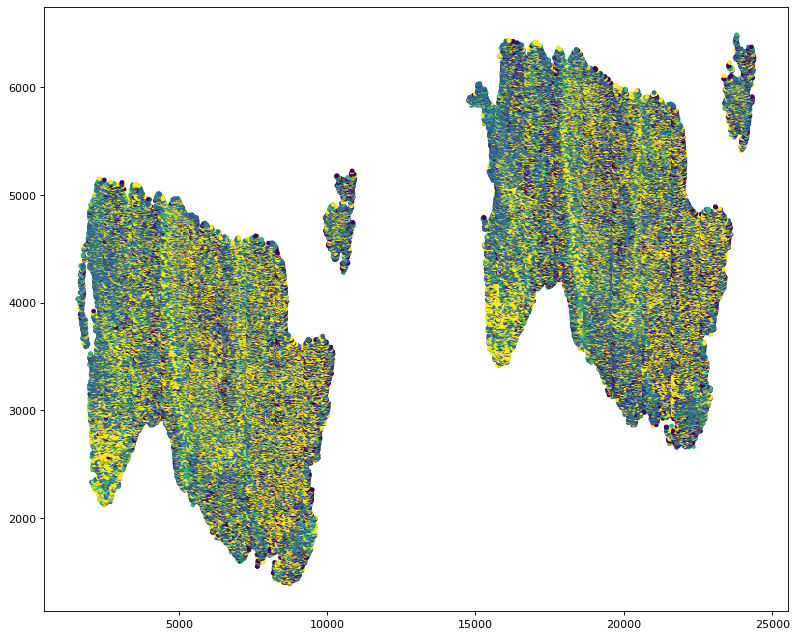

In [9]:
df_plot = df#.sample(40000)
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_plot['CentroidX'],df_plot['CentroidY'],s=10,c=df_plot['PredictedClass'], label=df_plot['cell_type'])
# plt.legend()

In [9]:
# fig, ax = plt.subplots(figsize=(20, 10))
# df.plot(kind='scatter',x='CentroidX',y='CentroidY', c='cell_type',colormap='viridis')

In [7]:
# fig, ax = plt.subplots(figsize=(20, 10))

# groups = df.groupby("cell_type")
# for name, group in groups:
#     if(name == 'Immune_cell'):
#         al = 0.7
#     elif(name == 'Tumor_cell'):
#         al=0.05
#     else:
#         al=0.2
#     plt.plot(group["CentroidX"], group["CentroidY"], marker="o", linestyle="", label=name, alpha=al)
# plt.legend()
# # groups

In [16]:
map_width = df['CentroidX'].max() -df['CentroidX'].min()

In [17]:
map_height = df['CentroidY'].max() -df['CentroidY'].min()

In [18]:
print(map_width, map_height)

22792.399999999998 5096.9


In [17]:
df['long'] = df.apply(add_long,axis=1)
df['lat'] = df.apply(add_lat,axis=1)

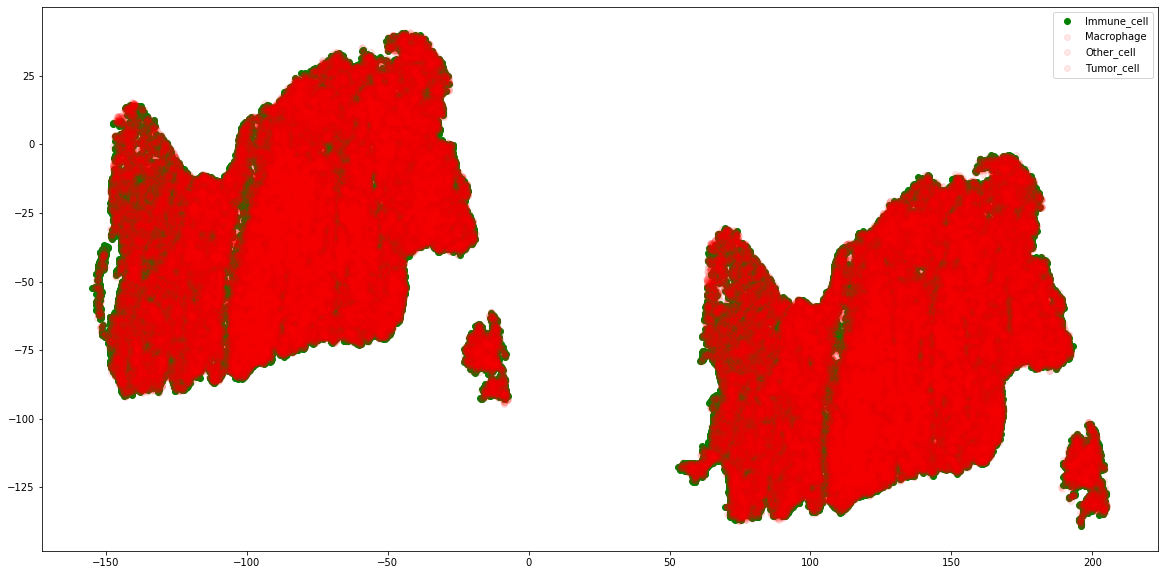

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

groups = df.groupby("cell_type")
for name, group in groups:
    if(name=='Immune_cell'):
        al = 1
        color = 'green'
    else:
        al=0.09
        color='red'
    plt.plot(group["long"], group["lat"], marker="o", linestyle="", label=name, alpha=al, c=color)
plt.legend()
# groups

In [19]:
df_save = df[['lat','long','PredictedClass']]

In [20]:
df_save.to_csv("lat_long_pred_class.csv")

In [21]:
df[['PredictedClass']].to_csv("pred_class.csv")

In [22]:
df[['lat','long']].to_csv("lat_long.csv")

In [10]:
df_save = df#.sample(40000)
df.columns

Index(['CentroidX', 'CentroidY', 'PredictedClass', 'TumorScore', 'TILScore',
       'OtherScore', 'MacrophageScore', 'cell_type'],
      dtype='object')

In [ ]:
# df_save[['CentroidX', 'CentroidY', 'PredictedClass']].to_csv('centroid_class.csv')

In [29]:
# df.loc[df['PredictedClass'] in [1,2]]
df_save = df.loc[df['PredictedClass'].isin([1,2])]
df_save[['CentroidX', 'CentroidY', 'PredictedClass','is_tumor','is_immune']].to_csv('centroid_class_tumor_immune.csv')

In [12]:
df_save

,CentroidX,CentroidY,PredictedClass,TumorScore,TILScore,OtherScore,MacrophageScore,cell_type
0,2488.1,2116.3,4,0.090909,0.000000,0.115702,0.793388,Macrophage
1,2509.5,2119.6,4,0.090909,0.000000,0.115702,0.793388,Macrophage
2,2483.0,2121.9,3,0.064748,0.014388,0.848921,0.071942,Other_cell
3,2524.1,2123.0,4,0.067308,0.096154,0.125000,0.711538,Macrophage
4,2535.5,2123.6,4,0.067308,0.096154,0.125000,0.711538,Macrophage
...,...,...,...,...,...,...,...,...
184766,23815.9,6468.3,3,0.064748,0.014388,0.848921,0.071942,Other_cell
184767,23813.6,6475.7,2,0.048485,0.857576,0.075758,0.018182,Immune_cell
184768,23802.7,6476.1,1,0.783088,0.018382,0.014706,0.183824,Tumor_cell
184769,23793.5,6481.1,2,0.048485,0.857576,0.075758,0.018182,Immune_cell
